In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## Euler explicite 

In [4]:
def F(Y, l1, l2, m1, m2):
    g = 9.81  # acceleration due to gravity
    theta1, theta2, theta1_dot, theta2_dot = Y
    diff = theta1 - theta2
    sum = m1+m2

    num1 = m2*g*np.sin(theta2)*np.cos(diff) + m2*l1*(theta1_dot**2)*np.sin(diff)*np.cos(diff) + m2*l2*(theta2_dot**2)*np.sin(diff) - sum*g*np.sin(theta1)
    num2 = -m2*l2*(theta2_dot**2)*np.sin(diff)*np.cos(diff) + sum * (g*np.sin(theta1)*np.cos(diff) - l1*(theta1_dot**2)*np.sin(diff) - g*np.sin(theta2))

    dem1 = sum*l1 - m2*l1*(np.cos(diff)**2)
    dem2 = sum*l2 - m2*l2*(np.cos(diff)**2)

    theta1_dot_dot = (num1/dem1)
    theta2_dot_dot = (num2/dem2)
    

    return np.array([theta1_dot, theta2_dot, theta1_dot_dot, theta2_dot_dot])

In [5]:
def Euler(Y, h, l1, l2, m1, m2):
    return Y + h * F(Y, l1, l2, m1, m2)

In [6]:
def solve(Y0, h, l1, l2, m1, m2, N):
    # Initialize the list of solutions with the initial condition
    Ys = [Y0]

    # Loop over all time steps
    for n in range(N):
        # Calculate the state at the next time step using the Euler method
        Y_next = Euler(Ys[-1], h, l1, l2, m1, m2)
        # Append the new state to the list of solutions
        Ys.append(Y_next)

    return Ys

In [13]:
# Given parameters
m1 = m2 = 1  
l1 = l2 = 1  
Y0 = np.array([np.pi/2, np.pi/2, 0, 0])  
N = 10**3  
T = 2 
h = T / N  # 

# Calculate the state at each time step
Ys = solve(Y0, h, l1, l2, m1, m2, N)

# Extract the angles of the two pendulums
theta1 = [Y[0] for Y in Ys]
theta2 = [Y[1] for Y in Ys]

# Calculate the x and y coordinates of the two pendulums from the angles
x1 = l1 * np.sin(theta1)
y1 = -l1 * np.cos(theta1)
x2 = x1 + l2 * np.sin(theta2)
y2 = y1 - l2 * np.cos(theta2)

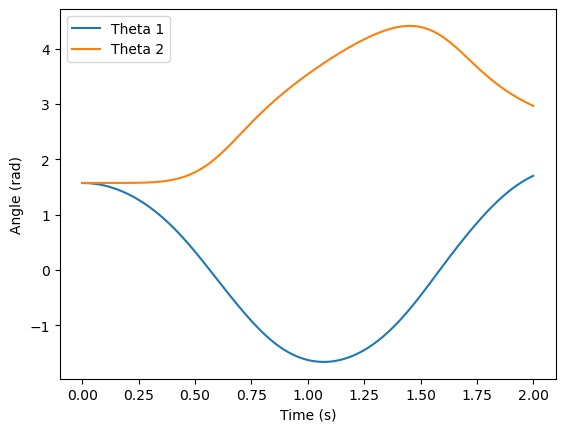

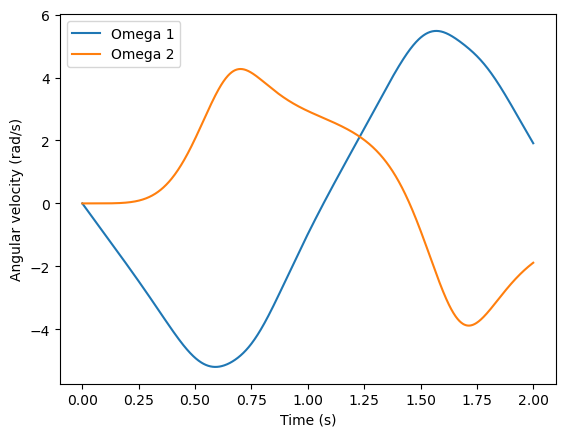

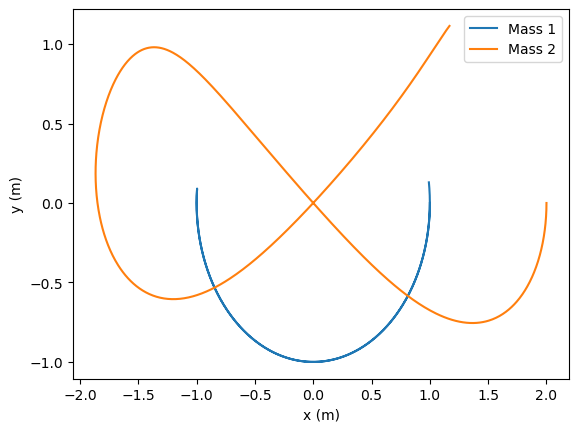

In [8]:
def anglePlot(Ys, h):
    # Extract the angles of the two pendulums
    theta1 = [Y[0] for Y in Ys]
    theta2 = [Y[1] for Y in Ys]

    # Create a time array
    t = np.arange(len(Ys)) * h

    # Plot the angles as a function of time
    plt.figure()
    plt.plot(t, theta1, label='Theta 1')
    plt.plot(t, theta2, label='Theta 2')
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (rad)')
    plt.show()

def angularVelocityPlot(Ys, h):
    # Extract the angular velocities of the two pendulums
    omega1 = [Y[2] for Y in Ys]
    omega2 = [Y[3] for Y in Ys]

    # Create a time array
    t = np.arange(len(Ys)) * h

    # Plot the angular velocities as a function of time
    plt.figure()
    plt.plot(t, omega1, label='Omega 1')
    plt.plot(t, omega2, label='Omega 2')
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Angular velocity (rad/s)')
    plt.savefig('angularVelocityEvolution.pdf')

def trajectoryPlot(Ys, l1, l2):
    # Extract the angles of the two pendulums
    theta1 = [Y[0] for Y in Ys]
    theta2 = [Y[1] for Y in Ys]

    # Calculate the x and y coordinates of the two pendulums
    x1 = l1 * np.sin(theta1)
    y1 = -l1 * np.cos(theta1)
    x2 = x1 + l2 * np.sin(theta2)
    y2 = y1 - (l2 * np.cos(theta2))

    # Plot the trajectory of the two pendulums
    plt.figure()
    plt.plot(x1, y1, label='Mass 1')
    plt.plot(x2, y2, label='Mass 2')
    plt.legend()
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.show()


anglePlot(Ys, h)
angularVelocityPlot(Ys, h)
trajectoryPlot(Ys, l1, l2)


## Energies

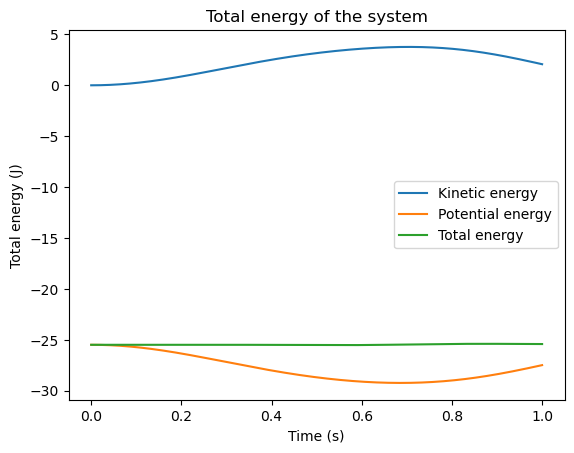

In [12]:
def Ec(Ys, m1, m2, l1, l2):
    g = 9.81
    theta1, theta2, theta1_dot, theta2_dot = Ys

    Ec1 = 0.5 * m1 * (l1**2) * (theta1_dot**2)
    Ec2 = 0.5 * m2 * ((l1**2) * (theta1_dot**2) + (l2**2) * (theta2_dot**2) + 2*l1*l2*theta1_dot*theta2_dot*np.cos(theta1-theta2))
    Ec = Ec1 + Ec2
    return Ec

def Ep(Ys, m1, m2, l1, l2):
    g = 9.81
    theta1, theta2, theta1_dot, theta2_dot = Ys

    Ep1 = -m1*g*l1*np.cos(theta1)
    Ep2 = -m2*g*(l1*np.cos(theta1) + l2*np.cos(theta2))
    Ep = Ep1 + Ep2
    return Ep


def Energy_compute(Ys, m1, m2, l1, l2):

    return Ec(Ys, m1, m2, l1, l2) + Ep(Ys, m1, m2, l1, l2)

def energyPlot(Ys, m1, m2, l1, l2):
    # Calculate the total energy at each time step
    Ec_list = [Ec(Y, m1, m2, l1, l2) for Y in Ys]
    Ep_list = [Ep(Y, m1, m2, l1, l2) for Y in Ys]
    ET_list = [Energy_compute(Y, m1, m2, l1, l2) for Y in Ys]   


    # Create a time array
    t = np.arange(len(Ys)) * h

    # Plot the total energy as a function of time
    plt.figure()
    plt.plot(t, Ec_list, label='Kinetic energy')
    plt.plot(t, Ep_list, label='Potential energy')
    plt.plot(t, ET_list, label='Total energy')
    plt.xlabel('Time (s)')
    plt.ylabel('Total energy (J)')
    plt.title('Total energy of the system')
    plt.legend()
    plt.show()

# Given parameters
m1 = m2 = 1  # kg
l1 = l2 = 1  # m
Y0 = np.array([np.pi/6, np.pi/6, 0, 0])  # initial state
N = 10**3  # number of time steps
T = 1  # s
h = T / N  # time step size

# Calculate the state at each time step using the Euler method
Ys = solve(Y0, h, l1, l2, m1, m2, N)

# Calculate and plot the total energy
energyPlot(Ys, m1, m2, l1, l2)

## with RK4

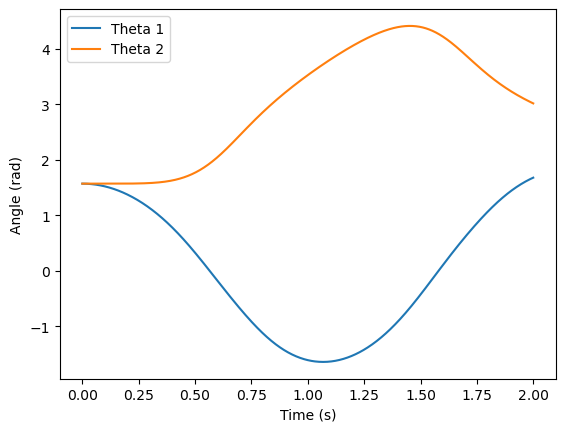

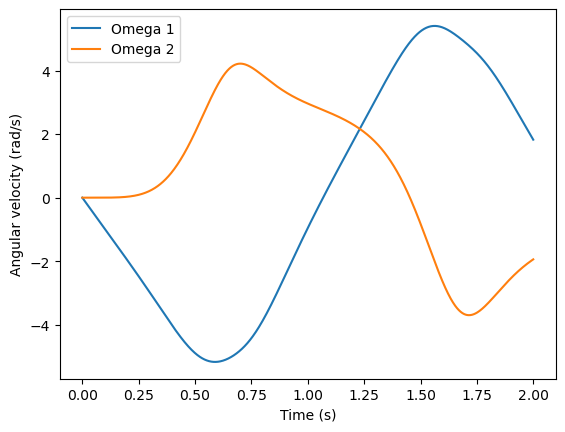

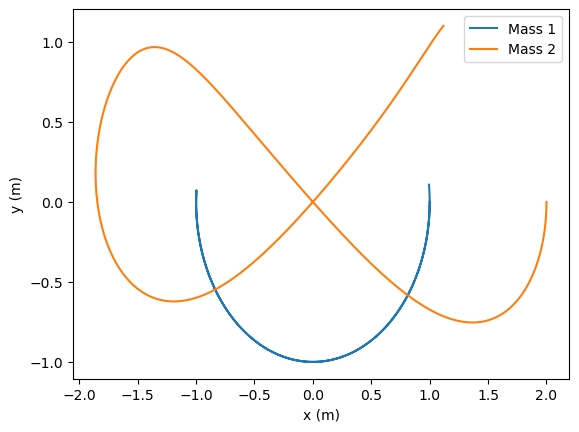

In [10]:
def RK4(Y, h, l1, l2, m1, m2):
    k1 = h * F(Y, l1, l2, m1, m2)
    k2 = h * F(Y + 0.5*k1, l1, l2, m1, m2)
    k3 = h * F(Y + 0.5*k2, l1, l2, m1, m2)
    k4 = h * F(Y + k3, l1, l2, m1, m2)
    return Y + (k1 + 2*k2 + 2*k3 + k4) / 6

def solve_RK4(Y0, h, l1, l2, m1, m2, N):
    # Initialize the list of solutions with the initial condition
    Ys = [Y0]

    # Loop over all time steps
    for n in range(N):
        # Calculate the state at the next time step using the RK4 method
        Y_next = RK4(Ys[-1], h, l1, l2, m1, m2)
        # Append the new state to the list of solutions
        Ys.append(Y_next)

    return Ys

# Given parameters
# Given parameters
m1 = m2 = 1  
l1 = l2 = 1  
Y0 = np.array([np.pi/2, np.pi/2, 0, 0])  
N = 10**3  
T = 2 
h = T / N  # 

# Calculate the state at each time step using the RK4 method
Ys_RK4 = solve_RK4(Y0, h, l1, l2, m1, m2, N)

anglePlot(Ys_RK4, h)
angularVelocityPlot(Ys_RK4, h)
trajectoryPlot(Ys_RK4, l1, l2)

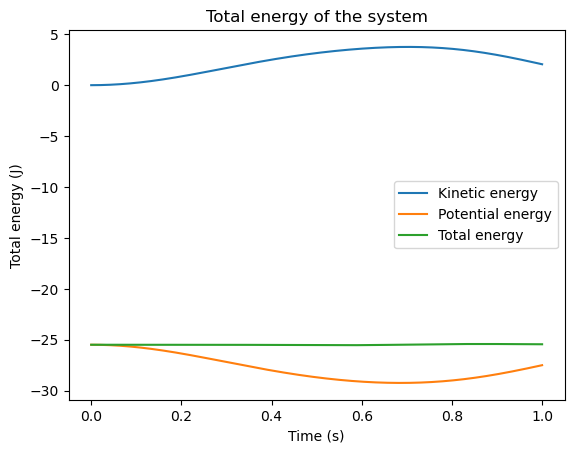

In [11]:
# Given parameters
m1 = m2 = 1  # kg
l1 = l2 = 1  # m
Y0 = np.array([np.pi/6, np.pi/6, 0, 0])  # initial state
N = 10**3  # number of time steps
T = 1  # s
h = T / N  # time step size

# Calculate the state at each time step using the Euler method
Ys = solve_RK4(Y0, h, l1, l2, m1, m2, N)

# Calculate and plot the total energy
energyPlot(Ys, m1, m2, l1, l2)